In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
GOOGLE_COLAB = True

In [0]:
%reload_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import sys
if GOOGLE_COLAB:
    sys.path.append('drive/My Drive/yelp_sentiment_analysis')
else:
    sys.path.append('../')

from yelpsent import data
from yelpsent import features
from yelpsent import metrics
from yelpsent import visualization
from yelpsent import models

In [0]:
import importlib
def reload():
  importlib.reload(data)
  importlib.reload(features)
  importlib.reload(metrics)
  importlib.reload(visualization)
  importlib.reload(models)

# Load Dataset

In [0]:
if GOOGLE_COLAB:
    data_train, data_test = data.load_dataset("drive/My Drive/yelp_sentiment_analysis/data/yelp_train_balanced.json",
                                              "drive/My Drive/yelp_sentiment_analysis/data/yelp_test.json")
else:
    data_train, data_test = data.load_dataset("../data/yelp_train.json",
                                              "../data/yelp_test.json")

In [0]:
X_train = data_train['review'].tolist()
y_train = data_train['sentiment'].tolist()

In [0]:
X_test = data_test['review'].tolist()
y_test = data_test['sentiment'].tolist()

# Load DTMs

In [0]:
with open('drive/My Drive/yelp_sentiment_analysis/pickles/vectorizer.pickle', 'rb') as f:
    vectorizer = pickle.load(f)

with open('drive/My Drive/yelp_sentiment_analysis/pickles/X_train_dtm.pickle', 'rb') as f:
    X_train_dtm = pickle.load(f)

with open('drive/My Drive/yelp_sentiment_analysis/pickles/X_test_dtm.pickle', 'rb') as f:
    X_test_dtm = pickle.load(f)

# Naive Bayes

In [0]:
from sklearn.naive_bayes import MultinomialNB

***Test - Alpha = 0.001***


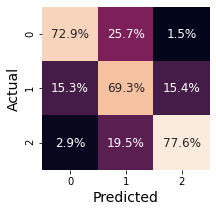

Macro F1 Scores: 
 Training: 0.842 
 Testing: 0.719


***Test - Alpha = 0.01***


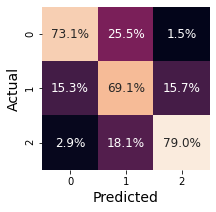

Macro F1 Scores: 
 Training: 0.837 
 Testing: 0.724


***Test - Alpha = 0.1***


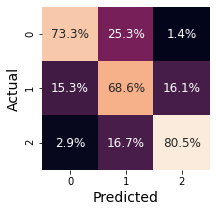

Macro F1 Scores: 
 Training: 0.828 
 Testing: 0.728


***Test - Alpha = 1.0***


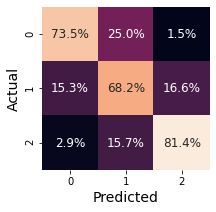

Macro F1 Scores: 
 Training: 0.813 
 Testing: 0.731


***Test - Alpha = 2.0***


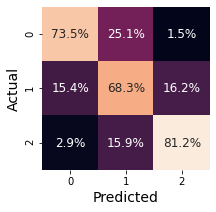

Macro F1 Scores: 
 Training: 0.805 
 Testing: 0.730




In [19]:
f1s_test = []
for alpha in [0.001, 0.01, 0.1, 1.0, 2.0]:
  print("***Test - Alpha = {alpha}***".format(alpha=alpha))
  _, _, _, f1_train, f1_test = models.train_and_test(X_train=X_train_dtm,
                                                     y_train=y_train,
                                                     X_test=X_test_dtm,
                                                     y_test=y_test,
                                                     classifier=MultinomialNB(alpha=alpha))
  f1s_test.append(f1_test)
  print("Macro F1 Scores: \n Training: {0:.3f} \n Testing: {1:.3f}\n\n".format(f1_train, f1_test))

In [0]:
model = MultinomialNB(alpha=1.0)

In [21]:
%time model.fit(X_train_dtm, y_train)

CPU times: user 341 ms, sys: 301 µs, total: 341 ms
Wall time: 342 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
with open('drive/My Drive/yelp_sentiment_analysis/models/naive_bayes.pickle', 'wb') as f:
  pickle.dump(model, f)

# with open('drive/My Drive/yelp_sentiment_analysis/models/naive_bayes.pickle', 'rb') as f:
#   model = pickle.load(f)

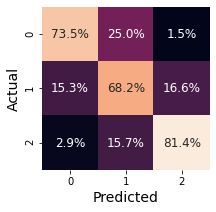

Macro F1 Scores: 
 Training: 0.813 
 Testing: 0.731




In [24]:
y_train_pred, y_test_pred, f1_train, f1_test =\
models.evaluate_pipeline(X_train = X_train_dtm,
                         y_train = y_train,
                         X_test = X_test_dtm,
                         y_test = y_test,
                         pipeline = model)

print("Macro F1 Scores: \n Training: {0:.3f} \n Testing: {1:.3f}\n\n".format(f1_train, f1_test))